In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yastn
import yastn.tn.mps as mps
from routines import fname_hamiltonian, fname_gs, fname_quench
from routines import generate_Hamiltonian
from routines.spinless_fermions_2ch import SpinlessFermions2ch

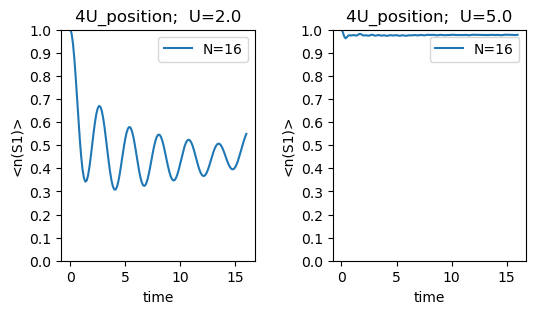

In [5]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(6, 3)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fontsize = 10

for vS in [1.0]:
    for ii, U in enumerate([2.0, 5.0]):
        for NW in [16]:
            param0 = {'basis': '4U_position',
                        'order': 'SLR',
                        'NW': NW,
                        'muL': 0.0,
                        'muR': 0.0,
                        'muS': 0.0,
                        'dmuS': -10.0,
                        'vS': vS,
                        'U': U,
                        'sym': 'U1xU1',
                        'w0': 1.0,
                        'occS': 1,
                        'occLR': NW,
                        'states': 2,
                        'max_sweeps2': 8,
                        'max_sweeps1': 64,
                        'Schmidt_tol': 1e-6,
                        'Ds': [16, 32]}

            param1 = param0.copy()
            param1["U"] = U
            param1["dmuS"] = 0.0
            param1["tolS"] = 1e-6
            param1["D0"] = 32
            param1["D1"] = 32
            param1["dt"] = 0.125
            param1["time"] = 16

            try:
                fname = fname_quench(param0, param1)
                with open(fname, 'rb') as f:
                    data = np.load(f, allow_pickle=True).item()
                time = data["times"]
                occs = data["occs"]
                ents = data["ents"]
                ax[ii].plot(time, occs[:, 1], label=f"N={NW}")
                ax[ii].set_xlabel("time")
                ax[ii].set_ylabel("<n(S1)>")
                ax[ii].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
                ax[ii].set_title(f"{param0['basis']};  U={U}")
            except FileNotFoundError:
                 pass
        ax[ii].legend()
        ax[ii].set_ylim(0, 1)

